<a href="https://colab.research.google.com/github/Jesse-Allister-Kasien-Elliott/rejection-sampling/blob/main/rejection_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

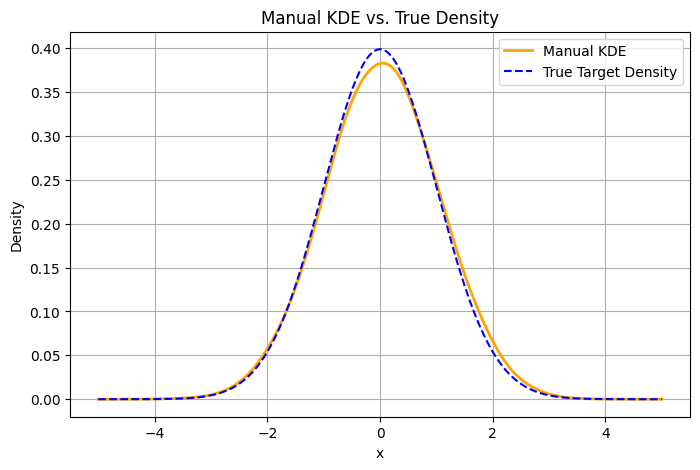

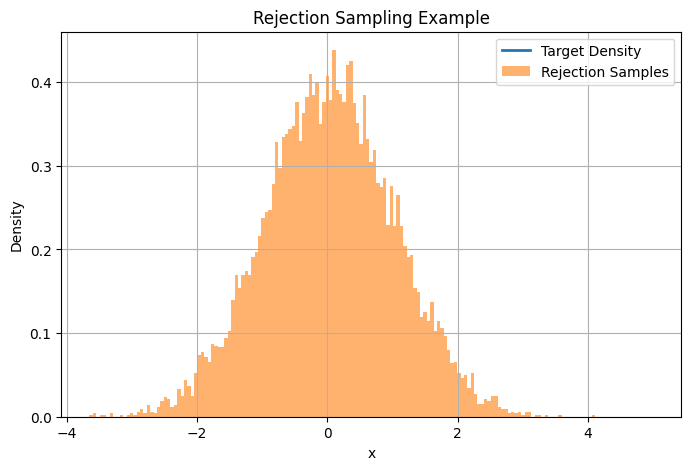

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# -----------------------------------------------------------
# Section 1: Rejection Sampling Setup
# -----------------------------------------------------------

# Target distribution: standard normal N(0, 1)
def target_density(x):
    return norm.pdf(x, loc=0, scale=1)

# Proposal distribution: uniform over [-5, 5]
def proposal_sample(n):
    return np.random.uniform(-5, 5, size=n)

def proposal_density(x):
    return 1 / 10  # Constant density of uniform[-5, 5]

# Rejection sampling algorithm
def rejection_sampling(n_samples, M=4):
    """
    Rejection sampling to draw samples from the target distribution.
    Parameters:
        n_samples (int): number of accepted samples to generate
        M (float): envelope constant such that M*q(x) >= p(x) for all x
    Returns:
        np.ndarray: accepted samples following the target distribution
    """
    samples = []
    while len(samples) < n_samples:
        x = proposal_sample(1)[0]
        u = np.random.uniform(0, M * proposal_density(x))
        if u <= target_density(x):
            samples.append(x)
    return np.array(samples)

# -----------------------------------------------------------
# Section 2: Generate Samples
# -----------------------------------------------------------

# Generate samples from the target using rejection sampling
samples = rejection_sampling(10000)

# -----------------------------------------------------------
# Section 2.5: Define Kernel for Manual KDE
# -----------------------------------------------------------

def gaussian_kernel(x, bandwidth):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x / bandwidth) ** 2)

# -----------------------------------------------------------
# Section 3: Learning from Samples (Manual KDE)
# -----------------------------------------------------------

# Create x-axis values where we want to evaluate the density
x_vals = np.linspace(-5, 5, 1000)

# Set bandwidth (width of each kernel bump)
bandwidth = 0.3

# Compute KDE manually
kde_values = []
for x in x_vals:
    kernel_sum = np.sum(gaussian_kernel(x - samples, bandwidth))
    kde_values.append(kernel_sum / (len(samples) * bandwidth))

# Plot manual KDE
plt.figure(figsize=(8, 5))
plt.plot(x_vals, kde_values, label='Manual KDE', color='orange', linewidth=2)

# Plot true density for comparison
plt.plot(x_vals, target_density(x_vals), label='True Target Density', color='blue', linestyle='--')

plt.title("Manual KDE vs. True Density")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


# -----------------------------------------------------------
# Section 4: Histogram vs. True Density (Optional)
# -----------------------------------------------------------

# Plot histogram of the sampled data vs. the target density

plt.figure(figsize=(8, 5))
plt.plot(x, target_density(x), label='Target Density', linewidth=2)
plt.hist(samples, bins=150, density=True, alpha=0.6, label='Rejection Samples')

plt.legend()
plt.title("Rejection Sampling Example")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()
